# 신용카드 사용자 연체 예측 AI 경진대회

- 주제: 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 
- 목적: 신용카드 사용자들의 개인 신상정보 데이터로 **사용자의 신용카드 대금 연체 정도를 예측**

- 데이터 설명:
    - **gender :** 고객의 성별, **binary**
    - **car :** 고객의 자차 보유 유무, **binary**
    - **reality :** 고객의 부동산 보유 유무, **binary**
    - **child_num :** 고객의 자녀 수, **integer**
    - **income_total :** 고객의 총 소득, **numeric**
    - **income_type :** 고객의 소득 유형, **category**
    - **edu_type :** 고객의 최종 학력, **category**
    - **family_type :** 고객의 본인의 혼인관련 상태, **category**
    - **house_type :** 고객의 거주지 형태, **category**
    - **DAYS_BIRTH :** (고객의 생일) - (현재 일), **integer**, **numeric**
    - **DAYS_EMPLOYED :** (고객의 첫 고용일) - (현재 일), **numeric**
    - **FLAG_MOBIL :** 고객의 본인 휴대폰 전화번호 등록 여부, **binary**
    - **work_phone :** 고객의 본인 직장 전화번호 등록 여부, **binary**
    - **phone :** 고객의 집 전화번호 등록 여부, **binary**
    - **email :** 고객의 이메일 등록여부, **binary**
    - **occyp_type :** 고객의 고용 형태, **category**
    - **family_size :** 고객의 가족의 크기, **integer**, **numeric**
    - **begin_month :** (고객이 카드를 발급한 월) - (현재 월), **integer**, **numeric**  
    
    - **<u>credit</u>** : 해당 신용카드의 대금 연체 정도 (0,1,2 : 커질수록 대금 연체 정도가 높다. target variable)
    
    
## 학습 목표에 대한 논의
### 학습 목표
- ```Credit``` 변수의 클래스 예측.
    - **classes :** 0, 1, 2
    - **description :** 사용자의 신용카드 대금 연체 정도.  
    - 각 값은 **상대적인 크기**에 대한 정보를 가지고 있다.
    - **imbalaced data**

- 다양한 features가 존재하지만 대부분의 feature에서 class의 비율은 일정하다.

- 데이터 관측치의 기준은 **'사용자'**가 아니라 **'카드'**이다. 
    - 카드 정보에만 해당하는 begin_month를 제외하고 모든 값이 일치하는 관측치는 같은 고객이라고 판단한다.
    - 가설) 카드 사용자를 몇 가지 유형으로 분류 할 수 있고, 유형에 따라 begin_month에 해당하는 credit 값들의 기준이 다르다.
    
- 평가기준:
    - **logloss** : 작을수록 좋은 결과


## 분석 방향에 대한 논의
### data anlysis process
1. EDA 
    - 데이터의 분포를 중심으로 탐색
2. Feature engineering
    - 변수 생성시에 어떤 변수가 유의할지, domain knowledge에서 크게 벗어나지 않게 판단하여 생성


In [142]:
# import necessary modules
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import floor


sns.set()
sns.set_color_codes()
sns.set_theme(style="ticks", palette="pastel")

print('<Check the versions of modules>')
print("- Seaborn version : ", sns.__version__)

<Check the versions of modules>
- Seaborn version :  0.11.1


In [46]:
# load data
# upload data
train = pd.read_csv('/Users/gangtaro/competition_data/DACON/14thMonthlyDacon/open/train.csv',
                   index_col=0)
test = pd.read_csv('/Users/gangtaro/competition_data/DACON/14thMonthlyDacon/open/test.csv',
                  index_col=0)
submit = pd.read_csv('/Users/gangtaro/competition_data/DACON/14thMonthlyDacon/open/sample_submission.csv')

In [47]:
# shape of data
print(train.shape)
print(test.shape)

(26457, 19)
(10000, 18)


> summary
- 데이터는 총 26457개의 관측치와 총 18개의 feature 그리고 target variable로 이루어져있다.
- public score는 test data의 credit variable 을 예측하는 것으로 총 10000개의 데이터를 예측해야한다.
    
---
## EDA
### target variable: credit

우선적으로 예측해야 되는 class 변수인 ```credit``` 변수를 탐색해본다.

In [48]:
train.credit.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [49]:
train.credit.value_counts(normalize = True)

2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: credit, dtype: float64

> summary
- 전체 train data set 에서 target variable의 class ratio는 약 2:1:0 = **0.64 : 0.23 : 0.12**이다. 클래스 간 불균형이다.

### binary variables (이진 변수)
- gender
- car
- reality
- FLAG_MOBIL
- work_phone
- phone
- email

In [50]:
print('<binary variables distribution of the train data>\n')
bin_cols = ['gender', 'car', 'reality', 'FLAG_MOBIL','work_phone', 'phone', 'email']
for cols in bin_cols : 
    print('>>> Column name : {}'.format(cols),'\n')
    print(train[cols].value_counts(),'\n')

<binary variables distribution of the train data>

>>> Column name : gender 

F    17697
M     8760
Name: gender, dtype: int64 

>>> Column name : car 

N    16410
Y    10047
Name: car, dtype: int64 

>>> Column name : reality 

Y    17830
N     8627
Name: reality, dtype: int64 

>>> Column name : FLAG_MOBIL 

1    26457
Name: FLAG_MOBIL, dtype: int64 

>>> Column name : work_phone 

0    20511
1     5946
Name: work_phone, dtype: int64 

>>> Column name : phone 

0    18672
1     7785
Name: phone, dtype: int64 

>>> Column name : email 

0    24042
1     2415
Name: email, dtype: int64 



이진변수의 분포는 다음과 같고, 다음으로는 이진 변수에서 positive 값과 negative 값에서 credit의 분포가 서로 상이하게 다르게 나타나는지 확인해본다.

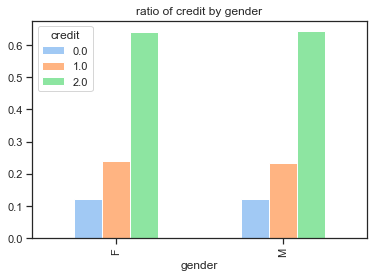

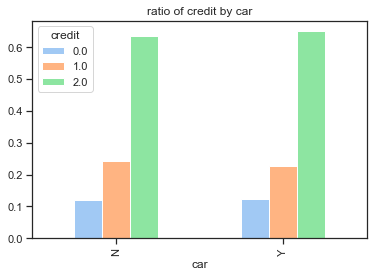

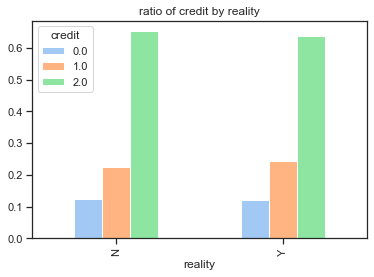

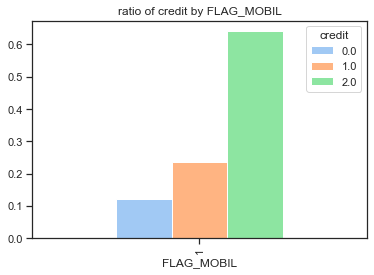

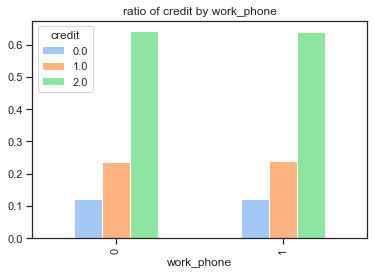

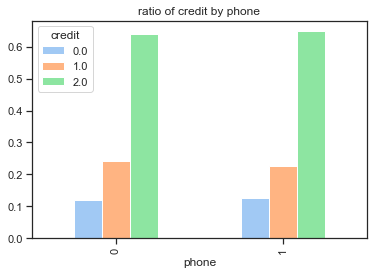

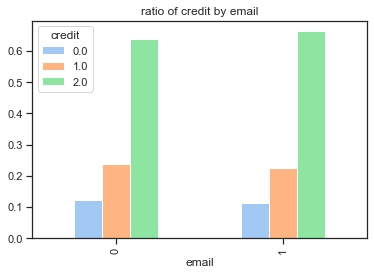

In [51]:
for cols in bin_cols :
    train.groupby(cols).credit.value_counts(normalize = True).unstack().plot(kind = 'bar', title = 'ratio of credit by {}'.format(cols))

> summary
- ```FLAG_MOBIL``` 는 오로지 1값만을 가진다. 가지고 있는 정보가 없으므로 제거해준다.
- 나머지 이진 변수에서는 모두 positive와 negative 사이에 ```credit``` class 비율의 차이가 거의 보이지 않는다.




In [52]:
# Eliminate worthless feature : FLAG_MOBIL (변수 제거)
train.drop('FLAG_MOBIL', axis =1, inplace = True)

# Categorical features with Binary encode (0 or 1; two categories) (변수 수치화)
for bin_feature in ['gender', 'car', 'reality', 'work_phone', 'phone', 'email']:
    train[bin_feature], uniques = pd.factorize(train[bin_feature])

### numeric variables (수치형 변수)
- child_num
- family_size
- income_total
- DAYS_BIRTH
- DAYS_EMPLOYED
- begin_month

#### child_num
- Range :  0, 1, 2, ... ,19 (integer)
- 카드사용자의 자녀 수에 대한 정보를 가진 변수

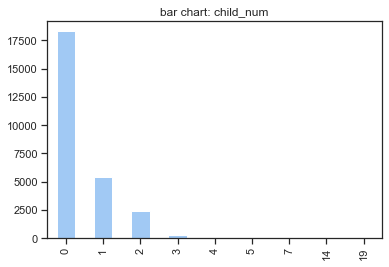

In [53]:
train.child_num.value_counts().sort_index().plot(kind = 'bar')
plt.title('bar chart: child_num')
plt.show()

In [54]:
train.child_num.value_counts().sort_index()

0     18340
1      5386
2      2362
3       306
4        47
5        10
7         2
14        3
19        1
Name: child_num, dtype: int64

> summary
- 대부분의 값이 0, 1, 2, 3에 속한다. (99.76%)
- 극히 일부 값들이 7, 14, 19와 같은 값을 가진다.
    - 이에 대해서 첨언을 하자면, 아이의 수가 5명이나 7명은 있을 수 있는 경우라고 생각하지만 아이의 수가 10을 넘어가는 14, 19를 나타내는 관측치는 **이상치**로 판단하여 제거해주는 선택을 해준다.
    
#### family_size
- Range :  [0, 1, 2, ... ] (integer)
- 본인 및 배우자, 자녀의 수를 합한 변수 또는 현 거주지에 같이 살고있는 가족의 수라고 추정.(본 관측치의 사람들은 모두 성인으로, 가족에 부모님의 수는 고려하지 않는 것으로 추정된다.)

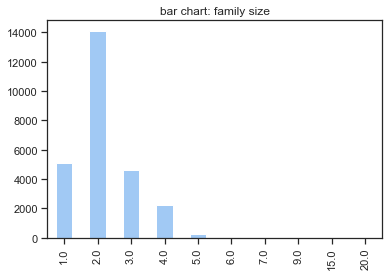

In [55]:
train.family_size.value_counts().sort_index().plot(kind = 'bar')
plt.title('bar chart: family size')
plt.show()

In [56]:
train.family_size.value_counts().sort_index()

1.0      5109
2.0     14106
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
9.0         2
15.0        3
20.0        1
Name: family_size, dtype: int64

> summary
- 2인 가족이 가장 많았고, 1~5인 가족이 대부분을 차지한다.
- ```family_type```변수와 ```child_num```변수와의 관계를 통해 이 변수의 값이 결정된다. (```family_type``` 변수 설명 때 논함)

#### income_total
- Range : [0, inf] (positive-float)
- 카드 사용자의 총 소득에 대한 변수


In [57]:
print('Max   : {}'.format(train.income_total.max()))
print('Min   : {}'.format(train.income_total.min()))

print('Mean  : {}'.format(train.income_total.mean()))
print('Median: {}'.format(train.income_total.median()))

Max   : 1575000.0
Min   : 27000.0
Mean  : 187306.52449257285
Median: 157500.0


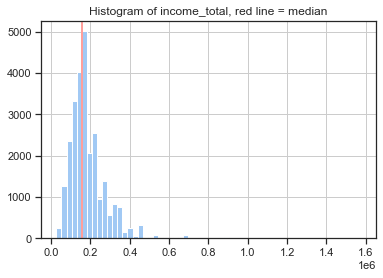

In [58]:
train.income_total.hist(bins = 60)
plt.title('Histogram of income_total, red line = median')
plt.axvline(x = train.income_total.median(), linewidth=2, color='r')
plt.show()

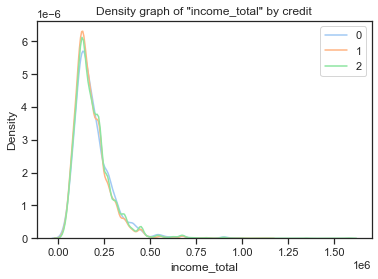

In [59]:
sns.kdeplot(x = 'income_total', data = train[train.credit == 0])
sns.kdeplot(x = 'income_total', data = train[train.credit == 1])
sns.kdeplot(x = 'income_total', data = train[train.credit == 2])
plt.legend([0,1,2])
plt.title('Density graph of "income_total" by credit')
plt.show()

> summary 
- ```credit``` class 별 ```income_total```의 density graph를 봤을때,  모든 ```credit``` class 에서 비슷한 밀도함수 그래프가 나타난다. -> 클래스 별 특징이 뚜렷하지 않아 다른 변수와의 조합을 통해서 좀 더 나은 변수의 생성을 기대 해 볼 수 있다.

#### DAYS_BIRTH
- (태어난 날짜) - (데이터 수집날짜 기준 시점 날짜)
- 나이에 대한 그래프
- 음수. 부호를 변경하면 그 사람이 살아온 DAYS로 의미가 변경되고, 365.25로 나누어서 소수점을 제거하면 당해 년도 그 사람의 나이가 된다.

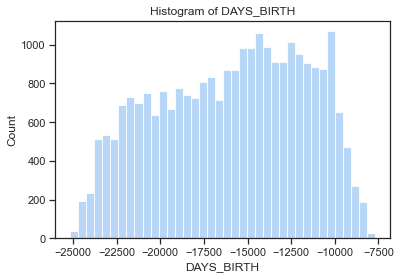

In [60]:
sns.histplot(train.DAYS_BIRTH)
plt.title('Histogram of DAYS_BIRTH')
plt.show()

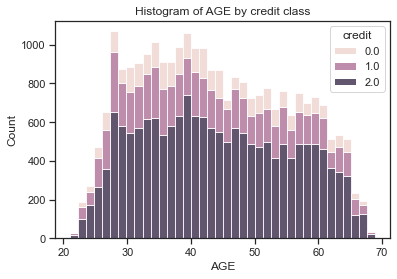

In [61]:
# 카드 사용자들의 나이와 credit class로 구분해주는 histogram
sns.histplot(x = train.DAYS_BIRTH/-365.25, data = train, hue = 'credit', multiple= 'stack')
plt.xlabel('AGE')
plt.title('Histogram of AGE by credit class')
plt.show()

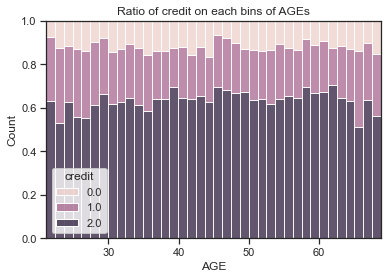

In [62]:
# 카드 사용자들의 나이구간별 credit class의 비율
sns.histplot(x = train.DAYS_BIRTH/-365.25, data = train, hue = 'credit', multiple= 'fill')
plt.xlabel('AGE')
plt.title('Ratio of credit on each bins of AGEs')
plt.show()

In [63]:
print('Max AGE    : {}'.format((train.DAYS_BIRTH/-365.25).max()))
print('Min AGE    : {}'.format((train.DAYS_BIRTH/-365.25).min()))

print('Mean   AGE : {}'.format((train.DAYS_BIRTH/-365.25).mean()))
print('Median AGE : {}'.format((train.DAYS_BIRTH/-365.25).median()))

Max AGE    : 68.86242299794661
Min AGE    : 21.09514031485284
Mean   AGE : 43.69077042786865
Median AGE : 42.56536618754278


> summary 
- 모든 카드사용자들은 **성인**이며 제일 나이가 적은 사용자는 21세이며 최고령자는 68세이다.
- 모든 나이대에서 credit class ratio 가 균일하게 나타난다.

#### DAYS_EMPLOYED
- (일을 시작한 날짜) - (데이터 수집날짜 기준 시점 날짜)
- 해당 카드 사용자의 **근무 기간**과 관련된 변수
- 음수. 부호를 변경해주면 현 시점까지 **근무한 날**로 의미가 변경된다.
- 결측값으로 보이는 값들이 존재한다(**365243**값을 가지는 데이터 다수 존재). 이 수치가 의미하는 바가 무엇인지 파악해야한다.

In [64]:
train.DAYS_EMPLOYED[train.DAYS_EMPLOYED > 0].value_counts()

365243    4438
Name: DAYS_EMPLOYED, dtype: int64

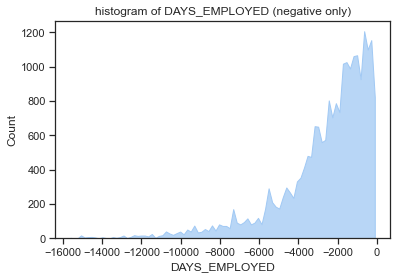

In [65]:
sns.histplot(train.DAYS_EMPLOYED[train.DAYS_EMPLOYED <= 0], element = "poly")
plt.title('histogram of DAYS_EMPLOYED (negative only)')
plt.show()

In [66]:
# 음수 중 최대 값은 -17로 나타난다.
print('Max value of DAYS_EMPLOYED(negative-only) : {} days'.format(train.DAYS_EMPLOYED[train.DAYS_EMPLOYED <= 0].max()))
print('Min value of DAYS_EMPLOYED(negative-only) : {} days -> {} years'.format(train.DAYS_EMPLOYED[train.DAYS_EMPLOYED <= 0].min(), train.DAYS_EMPLOYED[train.DAYS_EMPLOYED <= 0].min()/365.25))

Max value of DAYS_EMPLOYED(negative-only) : -17 days
Min value of DAYS_EMPLOYED(negative-only) : -15713 days -> -43.01984941820671 years


In [67]:
# 365243 값을 가지는 관측치의 occyp_type 변수의 결측 확인
# (Total= 4438, True= 365243값을 가지는 값들 중 occyp_type 결측 개수)
train[train.DAYS_EMPLOYED == 365243].occyp_type.isna().value_counts()

True    4438
Name: occyp_type, dtype: int64

In [68]:
len(train)

26457

> summary
- 365243 값을 가지는 값들은 26457개의 관측치 중 **4438개**
- ```occyp_type```라는 직업유형에 관련된 변수에서 전부 **결측치**로 발견된 점과 각 변수가 가진 의미로 미루어보아 근무기간이 0이라고 판단 가능하다.
- 따라서 365243 값을 가지는 모든 관측치를 0으로 변경해준다.



In [69]:
train['DAYS_EMPLOYED'][train['DAYS_EMPLOYED'] == 365243] = 0

#### begin_month
- (카드 사용자가 해당 카드를 발급한 날짜) - (데이터 수집날짜 기준 시점 날짜)
- 음수. 부호를 바꾸면 **해당 발급 후 경과된 개월 수**로 의미가 변경된다.

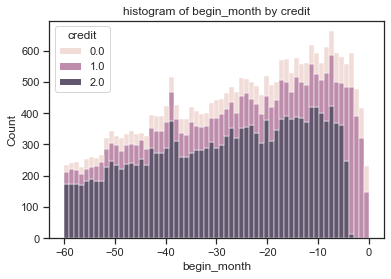

In [70]:
sns.histplot(x = 'begin_month', bins = 61, hue = 'credit', data = train, multiple = 'stack' )
plt.title('histogram of begin_month by credit')
plt.show()

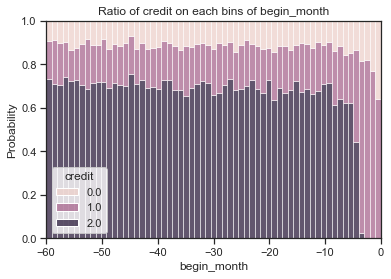

In [71]:
sns.histplot(x = 'begin_month', bins = 61, stat = 'probability',hue = 'credit', data = train, multiple = 'fill' )
plt.title('Ratio of credit on each bins of begin_month')
plt.show()

In [72]:
print('Max begin_month : {}'.format((-train.begin_month).max()))
print('Min begin_month : {}'.format((-train.begin_month).min()))

Max begin_month : 60.0
Min begin_month : -0.0


In [73]:
'proportion of credit==2 when lower than 4 months : {}%'.format(len(train[(train.begin_month >= -3)&(train.credit == 2)]) / len(train[(train.begin_month >= -3)])*100)

'proportion of credit==2 when lower than 4 months : 0.8736167734420501%'

> summary
- 0개월부터 60개월까지의 정수 구간 내의 값을 가진다.
- 발급 받은지 3개월 이내의 카드들은 credit==2 의 비율이 **매우 낮다.** (0.87%; 1퍼도 되지 않는다.)
- 발급 기간별 ```credit``` class 비율의 극명히 차이나는 구간이 분명이 존재하는 것으로 보인다.


### categorial variables
- income_type
- edu_type
- family_type
- house_type
- occyp_type

#### income_type
- 소득유형에 따른 분류

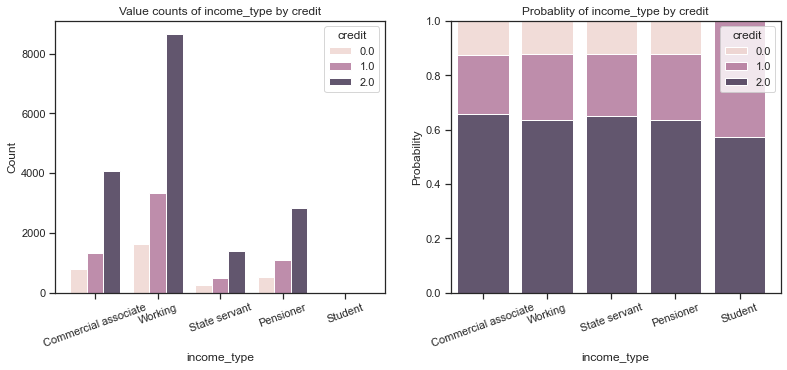

In [74]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(x = 'income_type', stat = 'count', data = train, hue = 'credit', 
             multiple= 'dodge', shrink=0.8)
plt.title('Value counts of income_type by credit')
plt.xticks(rotation = 20)

plt.subplot(1,2,2)
sns.histplot(x = 'income_type', stat = 'probability', data = train, hue = 'credit', 
             multiple= 'fill', shrink=0.8)
plt.title('Probablity of income_type by credit')
plt.xticks(rotation = 20)
plt.show()

In [75]:
train.income_type.value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

> summary
- 총 5개의 소득 유형에 대한 범주로 변수가 구성되어있다.
- 해당 범주의 이름으로 보아 소득 유형은 어떤 업계에 종사 하고 있는지에 대한 변수로 짐작이 가능하며, ```occyp_type``` 변수의 상위 범주라고 판단된다.
- 각 범주에 대하여 ```credit``` class의 비율이 상이하지 않다.
- **Student** 범주가 7개의 아주 적은 관측치가 발견된다.
- 하지만 지우거나 다른 범주에 편입 시키기에는 많은 정보가 없고 기준으로 삼을만한 변수도 딱히 존재하지 않으므로 그대로 두는 것이 올바른 판단이라 생각된다.

#### edu_type
- 카드 사용자의 최종학력에 대한 변수
- 총 5개의 범주로 구분되어있으며, 다음과 같이 더 크다는 순으로 학력이 높다고 알려져있다.
- 'Academic degree' > 'Higher education' > 'Incomplete higher' > 'Secondary' / 'second special' > 'Lower secondary'

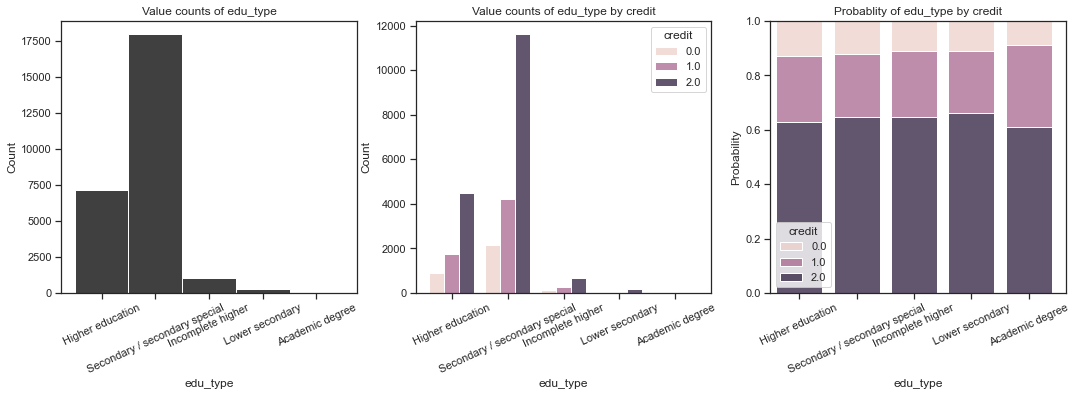

In [76]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(x = 'edu_type', stat = 'count', data = train, color = 'black')
plt.title('Value counts of edu_type')
plt.xticks(rotation = 25)

plt.subplot(1,3,2)
sns.histplot(x = 'edu_type', stat = 'count', data = train, hue = 'credit', 
             multiple= 'dodge', shrink=0.8)
plt.title('Value counts of edu_type by credit')
plt.xticks(rotation = 25)

plt.subplot(1,3,3)
sns.histplot(x = 'edu_type', stat = 'probability', data = train, hue = 'credit', 
             multiple= 'fill', shrink=0.8)
plt.title('Probablity of edu_type by credit')
plt.xticks(rotation = 25)
plt.show()

> summary
- 학력의 차이에 따라 ```credit``` class의 비율은 차이가 없는것으로 보인다.

#### family_type
- 카드 사용자의 **배우자** 유무에 초점을 둔 **가족 구성 유형** 변수
- 범주 구성: 기혼, 법률혼, 미혼, 과부, 이혼

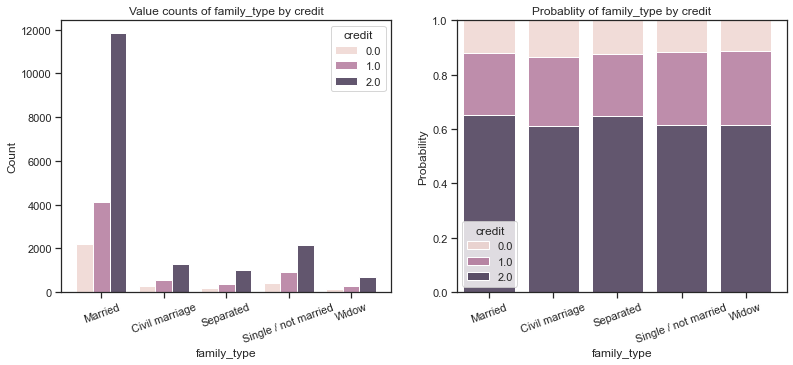

In [77]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(x = 'family_type', stat = 'count', data = train, hue = 'credit', 
             multiple= 'dodge', shrink=0.8)
plt.title('Value counts of family_type by credit')
plt.xticks(rotation = 20)

plt.subplot(1,2,2)
sns.histplot(x = 'family_type', stat = 'probability', data = train, hue = 'credit', 
             multiple= 'fill', shrink=0.8)
plt.title('Probablity of family_type by credit')
plt.xticks(rotation = 20)
plt.show()

In [78]:
print('<아이를 제외한 가족의 수>\n')
for f_type in train.family_type.unique() : 
    print('*',f_type)
    print((train.family_size - train.child_num).loc[train.family_type == f_type].value_counts())
    print()

<아이를 제외한 가족의 수>

* Married
 2.0    18193
 0.0        2
-1.0        1
dtype: int64

* Civil marriage
2.0    2122
0.0       1
dtype: int64

* Separated
1.0    1539
dtype: int64

* Single / not married
1.0    3478
2.0      16
0.0       2
dtype: int64

* Widow
1.0    1103
dtype: int64



> middle summary on ```family_type```
- family_size - child_num = 본인(1) + 배우자(1 or 0)
- 공식이 적용되지 않는 여러 관측치가 발견된다.
    - 공식이 적용되지 않는 데이터에 대하여 탐구하여 새로운 인사이트를 도출해낸다.

In [79]:
# 공식이 적용이 되지 않는 데이터
whether_married = train.family_type.copy()
whether_married.replace({'Married':2, 'Civil marriage':2, 'Separated':1, 'Single / not married':1, 'Widow':1}, inplace = True)
train[train.family_size - train.child_num != whether_married][['gender', 'DAYS_BIRTH', 'family_type','family_size', 'child_num', 'income_type', 'occyp_type', 'house_type','credit']].sort_values('family_type')

gender  DAYS_BIRTH           family_type  family_size  child_num  \
index                                                                     
18879       1      -12755        Civil marriage          1.0          1   
21096       1      -16424               Married          1.0          1   
16791       0      -12140               Married          1.0          1   
14900       1      -14776               Married          1.0          2   
684         0      -17880  Single / not married          2.0          0   
23249       1      -17585  Single / not married          2.0          0   
22776       0      -17584  Single / not married          2.0          0   
22262       0      -18975  Single / not married          2.0          0   
21027       0      -15466  Single / not married          3.0          1   
18305       1      -11810  Single / not married          4.0          2   
16110       0      -12723  Single / not married          1.0          1   
15407       0      -18179  Single / not married          2.0          0   
14287       0      -16138  Single / not married          3.0          1   
11308       1       -9786  Single / not married          2.0          0   
10279       0      -21648  Single / not married          2.0          0   
6683        0      -21363  Single / not married          2.0          0   
5825        1      -18173  Single / not married          1.0          1   
3890        0      -16611  Single / not married          4.0          2   
3138        0      -21432  Single / not married          2.0          0   
3064        0      -19399  Single / not married          2.0          0   
24754       0      -14523  Single / not married          2.0          0   
25463       1      -20333  Single / not married          2.0          0   

                income_type          occyp_type           house_type  credit  
index                                                                         
18879  Commercial associate                 NaN    House / apartment     2.0  
21096               Working             Drivers    House / apartment     2.0  
16791               Working          Core staff    House / apartment     2.0  
14900               Working             Drivers    House / apartment     2.0  
684                 Working       Cooking staff  Municipal apartment     2.0  
23249               Working             Drivers    House / apartment     2.0  
22776         State servant          Core staff    House / apartment     2.0  
22262               Working          Core staff    House / apartment     2.0  
21027  Commercial associate  Low-skill Laborers    House / apartment     2.0  
18305               Working                 NaN    House / apartment     2.0  
16110               Working         Sales staff    House / apartment     2.0  
15407               Working            Laborers    House / apartment     2.0  
14287  Commercial associate         Sales staff    House / apartment     2.0  
11308  Commercial associate            Laborers         With parents     2.0  
10279             Pensioner                 NaN    House / apartment     2.0  
6683              Pensioner                 NaN  Municipal apartment     2.0  
5825   Commercial associate          Core staff    House / apartment     2.0  
3890                Working                 NaN    House / apartment     2.0  
3138              Pensioner                 NaN    House / apartment     2.0  
3064   Commercial associate                 NaN    House / apartment     2.0  
24754               Working          Core staff    House / apartment     2.0  
25463         State servant             Drivers    House / apartment     2.0

- 다수의 공식과 일치하지 않은 관측치들이 **Single / not married** 범주인 것으로 확인된다.
- **Single / not married** 이면서 배우자있는 것으로 보이는 관측치라고 생각된다.
- 따라서 **Single / not married** 범주를 다음과 같은 두 가지 범주로 다시 나누어준다.
    - **Absolutely Single** : 결혼을 하지도, 따로 동거인이 있지도
    - **Married**: 결혼은 하지 않았으나, 가족이라고 여겨지는 동거인이 있다.(사실혼 관계이므로 **Married**로 간주)
- 여기서 일부는 아이가 1명 있지만 가족의 수가 1로 나타난다. -> 이또한 가족의 수를 2로 변경해준다.
    
    
- 극히 일부의 관측치에서 (Married, Civil marriage) 공식과 일치하지 않게 나타나는 이유는 자녀가 있으면서 가족의 수가 1로 기입되어있어서 그렇다.
- 이 현상은 두 가지 가설로 생각 해볼 수 있다.
    - 단순 기입 오류
    - 혼자 사는 경우
- 혼자 사는 경우일 확률이 높지만, 실제 자녀가 있고 Married, Civil marriage 범주의 속하는 데이터에도 분명 혼자사는 경우의 관측치가 분명 적지 않은 크기로 존재할 것이지만, 구별 해낼 방법이 없기때문에, 본래의 범주 구분 의미를 토대로 이를 단순 기입 오류라고 생각한다.
- 모든 Married, Civil marriage인 데이터에 대하여, family_size = 2 + child_num로 변경해준다.

In [80]:
# Single / not married 범주의 분해
train.family_type[(train.family_type == 'Single / not married')&(train.family_size - train.child_num == 2)] = 'Married'
train.family_type[train.family_type == 'Single / not married'] = 'Absolutely Single'
train.family_type.value_counts()

Married              18212
Absolutely Single     3480
Civil marriage        2123
Separated             1539
Widow                 1103
Name: family_type, dtype: int64

In [84]:
whether_married_new = train.family_type.copy()
whether_married_new.replace({'Married':2, 'Civil marriage':2, 'Separated':1, 'Absolutely Single':1, 'Widow':1}, inplace = True)
train[train.family_size - train.child_num != whether_married_new][['gender', 'DAYS_BIRTH', 'family_type','family_size', 'child_num', 'income_type', 'occyp_type', 'house_type','credit']].sort_values('family_type')

gender  DAYS_BIRTH        family_type  family_size  child_num  \
index                                                                  
5825        1      -18173  Absolutely Single          1.0          1   
16110       0      -12723  Absolutely Single          1.0          1   
18879       1      -12755     Civil marriage          1.0          1   
14900       1      -14776            Married          1.0          2   
16791       0      -12140            Married          1.0          1   
21096       1      -16424            Married          1.0          1   

                income_type   occyp_type         house_type  credit  
index                                                                
5825   Commercial associate   Core staff  House / apartment     2.0  
16110               Working  Sales staff  House / apartment     2.0  
18879  Commercial associate          NaN  House / apartment     2.0  
14900               Working      Drivers  House / apartment     2.0  
16791               Working   Core staff  House / apartment     2.0  
21096               Working      Drivers  House / apartment     2.0

In [86]:
# family_size 기입 오류 수정
train.family_size = whether_married_new + train.child_num

> final summary on ```family_type```
- ```family_size```와 ```family_type```, ```child_num``` 사이에 <u>확실한 관계</u>가 있다고 했을 때, 다음과 같은 혼동되는 관측치의 범주를 수정해주었다.
    1. 'Single / not married' 이면서 자녀 이외의 동거인을 가족의 수에 포함하는 경우. -> **사실혼 관계**로 추정하여 '**Married**' 범주에 **편입**.
    2.  나머지 'Single / not married' 범주의 관측치는 확실히 혼자인 관측치 이므로 '**Absolutely Single**' 범주로 **이름 변경**.
    3.  ```family_type```와 ```child_num```에서 예상되는 ```family_size```의 값과 다른 경우, 예상 값으로 대체한다. 
    
#### house_type
- 카드 사용자의 거주 유형에 관한 범주형 변수
- 총 6개의 범주로 구성되어있다.
- 대부분의 관측치가 가장 포괄적인 개념의 범주인  '**House / apartment**'에 포함되어있다.(약 89%)

In [89]:
train.house_type.value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

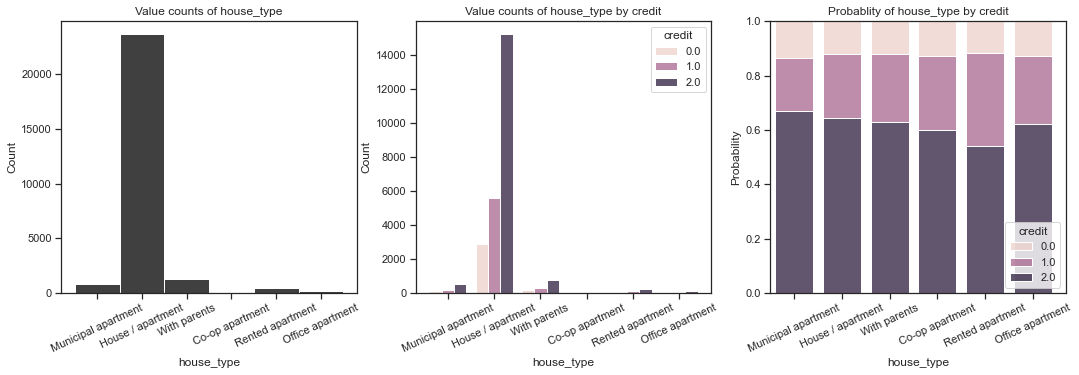

In [90]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(x = 'house_type', stat = 'count', data = train, color = 'black')
plt.title('Value counts of house_type')
plt.xticks(rotation = 25)

plt.subplot(1,3,2)
sns.histplot(x = 'house_type', stat = 'count', data = train, hue = 'credit', 
             multiple= 'dodge', shrink=0.8)
plt.title('Value counts of house_type by credit')
plt.xticks(rotation = 25)

plt.subplot(1,3,3)
sns.histplot(x = 'house_type', stat = 'probability', data = train, hue = 'credit', 
             multiple= 'fill', shrink=0.8)
plt.title('Probablity of house_type by credit')
plt.xticks(rotation = 25)
plt.show()

> summary
- 각 범주에서 credit의 비율이 크게 다르지 않으나 '**Rented apartment**' 범주에 속하는 관측치의 ```credit``` 비율은 다른 범주보다 class 1의 비율은 더 크고, class 2의 비율은 더 작은 것으로 보인다.

#### occyp_type
- 카드 사용자의 직업 유형에 대한 변수
- 가장 많은 범주를 가진 범주형 변수
- **결측치**가 존재

In [103]:
print('number of missing value: ',sum(train.occyp_type.isna()))

number of missing value:  0


In [104]:
train.occyp_type.fillna('Missing occyp', inplace=True)

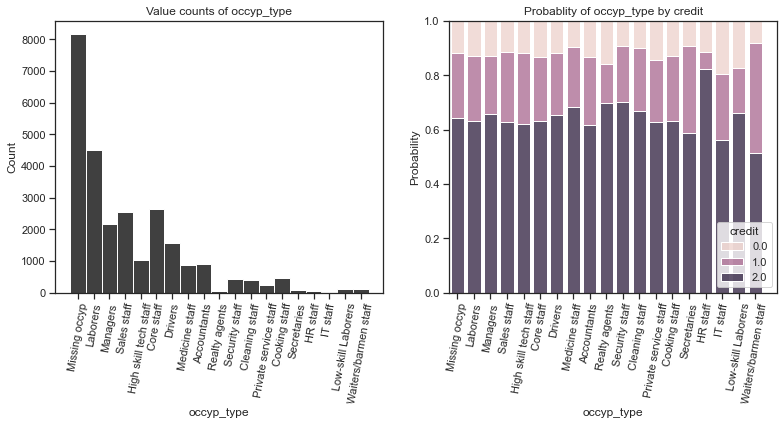

In [107]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(x = 'occyp_type', stat = 'count', data = train, color = 'black')
plt.title('Value counts of occyp_type')
plt.xticks(rotation = 80)

plt.subplot(1,3,2)
sns.histplot(x = 'occyp_type', stat = 'probability', data = train, hue = 'credit', 
             multiple= 'fill', shrink=0.8)
plt.title('Probablity of occyp_type by credit')
plt.xticks(rotation = 80)
plt.show()

> middle summary on ```occyp_type```
- 총 **8171**개라는 큰 숫자의 **결측치**가 존재 -> '**Missing occyp**'라는 범주로 이름을 달아줌.
- 몇몇의 범주에서 ```credit``` class 비율이 확연하게 차이가 난다고 하지만, 이는 데이터 개수의 부족에서 기인한 현상이라고 판단.


- 결측치가 생긱 이유는 다음과 같은 두 가지로 추정가능.
    - 카드 사용자가 실제 하고 있는 직군이 없는 경우
    - 카드 사용자가 직업 기입을 누락 시킨 경우(고의 또는 의도에 의한 누락)

In [108]:
pd.crosstab(train.DAYS_EMPLOYED == 0, train.occyp_type == 'Missing occyp', margins=True)

occyp_type     False  True    All
DAYS_EMPLOYED                    
False          18286  3733  22019
True               0  4438   4438
All            18286  8171  26457

- **Missing occyp** 인 8171개의 관측치 중, ```DAYS_EMPLOYED```에서 **365243**값을 가졌던 4438개의 관측치 중 모든 4438개(100%)가 여기에 속한다. 
- 이것으로부터 ```DAYS_EMPLOYED```에서 **365243**값을 가졌던 4438개의 관측치는 직업이 없다는 이유에서 **Missing occyp**에 속하게 되었다고 판단.
    - ```DAYS_EMPLOYED```==**365243** & ```occyp_type``` == **'Missing occyp'** 인 관측치에 대해서 직업이 없다라는 의미의   **'inoccyp'** 범주를 만들어 여기에 속하게 만든다.
    - 나머지 결측치에 대해선 **'blank'** 라는 범주라고 한다.

In [111]:
train.loc[(train.DAYS_EMPLOYED == 0)&(train.occyp_type == 'Missing occyp'), 'occyp_type'] = 'inoccyp'
train.loc[(train.DAYS_EMPLOYED != 0)&(train.occyp_type == 'Missing occyp'), 'occyp_type'] = 'blank'

In [113]:
train.occyp_type.value_counts()

Laborers                 4512
inoccyp                  4438
blank                    3733
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [126]:
# 연금 수령자의 경우(occyp_type = inoccyp 제외)
train[(train.income_type == 'Pensioner')&(train.occyp_type != 'inoccyp')][['occyp_type','DAYS_EMPLOYED']]

occyp_type  DAYS_EMPLOYED
index                               
1964   Medicine staff          -1325
5786         Laborers          -2208
6695       Core staff          -2745
6743            blank           -586
9793         Laborers           -198
10357         Drivers           -443
14356        Laborers          -3680
15682           blank           -673
17278      Core staff           -672
23227     Accountants           -620
26159        Managers          -5521

- ```income_type```(소득 유형)이 ```occyp_type```(직업 유형)의 상위 범주라고 가정했을때, **Pensioner**(연금수령자)의 경우 직업유형은 모두 **inoccyp**(직업 없음)이여야한다. 따라서 이를 따르지 않는 데이터에 대하여 ```DAYS_EMPLOYED```는 0으로, ```occyp_type```는 **inoccyp**로 수정해준다.

In [128]:
train.occyp_type[train.income_type == 'Pensioner'] = 'inoccyp'
train.DAYS_EMPLOYED[train.income_type == 'Pensioner'] = 0

> final summary on ```occyp_type```
- 결측치에 대하여 다음과 같은 처리 작업을 하였음.
    - **Pensioner**(연금수령자)의 경우, **inoccyp**(직업없음)으로 표시. (추가적으로, 일한기간도 0으로 만들어 줬다.)
    - 나머지에 대해서는 **blank**(누락)으로 표시.

### 중복데이터에 관한 이슈
- 데이터를 살펴보다보면 서로 다른 관측치에서 같은 사람으로 보이는 정보가 다수 발견된다. 이를 통해 이는 단순이 각 개인별 정보가 아닌 발급된 카드 중심의 데이터로 사용자의 중복은 있을 수도 있다는 것을 판단하였다. 이에 관한 변수를 지정해주는 작업의 필요성을 통해 다음과 같은 변수를 추가해준다.

#### 개인식별 변수 생성: ID
- 본 데이터의 카드 사용자들은 중복으로 보이는 데이터가 존재하는 것을 확인하였다. 이를 식별하는 데이터를 만들어준다.

In [132]:
train['ID'] = \
train['gender'].astype('str') + \
train['car'].astype('str') + \
train['reality'].astype('str') + '_' + \
train['child_num'].astype('str') + '_' + \
train['income_total'].astype('str') + '_' + \
train['income_type'].astype('str') + '_' + \
train['family_type'].astype('str') + '_' + \
train['house_type'].astype('str') + '_' + \
train['phone'].astype('str') + '_' + \
train['email'].astype('str') + '_' + \
train['family_size'].astype('str') + '_' + \
train['DAYS_BIRTH'].astype('str') + '_' + \
train['DAYS_EMPLOYED'].astype('str') + '_' + \
train['occyp_type'].astype('str') 

train.ID.nunique()
print('number of ID   :   {} \nsize of train  :  {}'.format(train.ID.nunique(), len(train)))

number of ID   :   8744 
size of train  :  26457


- train data(이상치 제외)는 8744명의 26457개의 카드 사용자의 정보이다.

## Feature engineering
- 범주형변수(이진변수 포함)의 조합을 통한 의미적으로 더 세분화한 변수 생성

In [140]:
# 동산/부동산 보유 정보
train['group_property'] = train['car'].astype(str)   + train['reality'].astype(str)

# 연락처 종류에 관한 정보
train['group_contacts'] = train['phone'].astype(str) + train['work_phone'].astype(str) + train['email'].astype(str)

# 어떤 성별의 어떤 가정을 이루고 있는지에 대한 정보
train['group_whoare_u'] = train['gender'].astype(str)+ train['family_type'].astype(str) + (train['child_num'] > 0).replace({True : 'hav child', False : 'dont hav child'}) 

# 소득원천, 직업종류에 대한 결합 정보                                                                                               
train['group_your_job'] = train['income_type'] +'_'+ train['occyp_type']


# 
                                                                                               
                                                                                               

In [143]:
# 현재 하고 있는 일을 시작하게 된 나이(날짜) = 일을 하지 않았던 기간 
train['DAYS_nowork'] = train['DAYS_BIRTH'] - train['DAYS_EMPLOYED']

# 가족 수와 관련된 변수
train['adult_num'] = train['family_size'] - train['child_num']
train.loc[train.child_num >= 5, 'child_num'] = 5
train.loc[train.child_num >= 5, 'family_size'] = train.loc[train.child_num >= 5, 'child_num'] + train.loc[train.child_num >= 5, 'adult_num']

# 소득과 관련된 변수와 조합
train['income_per_child'] = train['income_total']/ train['child_num']  #소득을 아이 수로 나눠 각 아이에게 할당 될 수 있는 금액을 계산 
train['income_per_family']= train['income_total']/ train['family_size']#소득을 가족 수로 나눠 각 인원에게 할당 될 수 있는 금액을 계산
train['income_per_age']   = train['income_total']/ train['DAYS_BIRTH'] #소득을 나이로 나눠 나이 대비 얼마나 버는지에 대한 지표 생성

# 로그 변환(income_total)
train['income_total_log'] = np.log(train['income_total']+1)

# 날짜표기 변환(begin_month) : 4로 나누어 계절로 분할
train['begin_season'] = train['begin_month'].apply(lambda x: floor(x/4))

# 날짜표기 변환(DAYS_EMPLOYED) : 개월로 binning
train['mm_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x: floor(x/30.4375))

# 날쨔 표기 변환(DAYS_EMPLOYED): 연차로 binning
train['yy_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x: floor(x/365.25))

